In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
sns.set()

df=pd.read_csv('channel_spend_graduate.csv')
a=open('customer_service_reps','rb')
info1=pickle.load(a)
df1=pd.DataFrame(info1)

d=open('subscribers','rb')
info4=pickle.load(d)
df4=pd.DataFrame(info4)

c=open('engagement (1)','rb')
info3=pickle.load(c)
df3=pd.DataFrame(info3)

df5=pd.read_csv('subscribers.csv')

In [2]:
df1

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [3]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [4]:
df4['account_creation_date'] = pd.to_datetime(df4['account_creation_date']).dt.date
df4['account_creation_date'] = df4['account_creation_date'].apply(lambda x: x.strftime('%Y%m'))
df4



,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [5]:
df4['account_creation_date']

162502    202001
380374    202003
496617    201912
356799    202001
681701    201910
           ...  
509326    201911
229587    201912
281340    201912
87198     202001
598241    201911
Name: account_creation_date, Length: 227628, dtype: object

In [6]:
df4['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
criteo                        44
appstore                      44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [8]:
df

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90
5,bing,201908,900
6,display,201908,20
7,facebook,201908,13000
8,search,201908,18500
9,youtube,201908,180


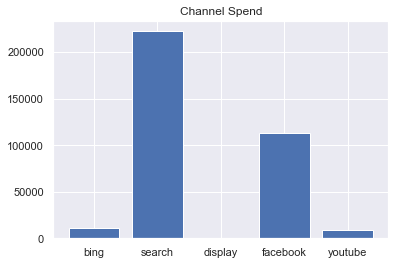

In [9]:
#total calc channel spend
df.describe(include=object)
bingcount=df.loc[df['channel'] == 'bing', 'spend_AED'].sum()
searchcount=df.loc[df['channel'] == 'search', 'spend_AED'].sum()
displaycount=df.loc[df['channel'] == 'display', 'spend_AED'].sum()
facebookcount=df.loc[df['channel'] == 'facebook', 'spend_AED'].sum()
youtubecount=df.loc[df['channel'] == 'youtube', 'spend_AED'].sum()


namelist=['bing','search','display','facebook','youtube']
countlist=[bingcount,searchcount,displaycount, facebookcount,youtubecount]
plt.bar(namelist,countlist)
plt.title('Channel Spend')
plt.show()

In [97]:
displaycount

366

In [10]:
#filter for conversions
df4conversions=df4[df4['paid_TF']==True]
df4conversions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92050 entries, 162502 to 87198
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   subid                         92050 non-null  int64         
 1   package_type                  77418 non-null  object        
 2   num_weekly_services_utilized  42371 non-null  float64       
 3   preferred_genre               77106 non-null  object        
 4   intended_use                  90388 non-null  object        
 5   weekly_consumption_hour       55858 non-null  float64       
 6   num_ideal_streaming_services  41486 non-null  float64       
 7   retarget_TF                   92050 non-null  bool          
 8   age                           56971 non-null  float64       
 9   male_TF                       91874 non-null  object        
 10  country                       92050 non-null  object        
 11  attribution_technical  

In [40]:
# calc per month - 072019
bing072019=df[(df["channel"]=="bing") & (df["date"]==201907)]
bing072019=bing072019['spend_AED']
search072019=df[(df["channel"]=="search") & (df["date"]==201907)]
search072019=search072019['spend_AED']
display072019=df[(df["channel"]=="display") & (df["date"]==201907)]
display072019=display072019['spend_AED']
facebook072019=df[(df["channel"]=="facebook") & (df["date"]==201907)]
facebook072019=facebook072019['spend_AED']
youtube072019=df[(df["channel"]=="youtube") & (df["date"]==201907)]
youtube072019=youtube072019['spend_AED']


#calc per month - 082019
bing082019=df[(df["channel"]=="bing") & (df["date"]==201908)]
bing082019=bing082019['spend_AED']
search082019=df[(df["channel"]=="search") & (df["date"]==201908)]
search082019=search082019['spend_AED']
display082019=df[(df["channel"]=="display") & (df["date"]==201908)]
display082019=display082019['spend_AED']
facebook082019=df[(df["channel"]=="facebook") & (df["date"]==201908)]
facebook082019=facebook082019['spend_AED']
youtube082019=df[(df["channel"]=="youtube") & (df["date"]==201908)]
youtube082019=youtube082019['spend_AED']

#calc per month - 092019
bing092019=df[(df["channel"]=="bing") & (df["date"]==201909)]
bing092019=bing092019['spend_AED']
search092019=df[(df["channel"]=="search") & (df["date"]==201909)]
search092019=search092019['spend_AED']
display092019=df[(df["channel"]=="display") & (df["date"]==201909)]
display092019=display092019['spend_AED']
facebook092019=df[(df["channel"]=="facebook") & (df["date"]==201909)]
facebook092019=facebook092019['spend_AED']
youtube092019=df[(df["channel"]=="youtube") & (df["date"]==201909)]
youtube092019=youtube092019['spend_AED']


#calc per month - 102019
bing102019=df[(df["channel"]=="bing") & (df["date"]==201910)]
bing102019=bing102019['spend_AED']
search102019=df[(df["channel"]=="search") & (df["date"]==201910)]
search102019=search102019['spend_AED']
display102019=df[(df["channel"]=="display") & (df["date"]==201910)]
display102019=display102019['spend_AED']
facebook102019=df[(df["channel"]=="facebook") & (df["date"]==201910)]
facebook102019=facebook102019['spend_AED']
youtube102019=df[(df["channel"]=="youtube") & (df["date"]==201910)]
youtube102019=youtube102019['spend_AED']



#calc per month - 112019
bing112019=df[(df["channel"]=="bing") & (df["date"]==201911)]
bing112019=bing112019['spend_AED']
search112019=df[(df["channel"]=="search") & (df["date"]==201911)]
search112019=search112019['spend_AED']
display112019=df[(df["channel"]=="display") & (df["date"]==201911)]
display112019=display112019['spend_AED']
facebook112019=df[(df["channel"]=="facebook") & (df["date"]==201911)]
facebook112019=facebook112019['spend_AED']
youtube112019=df[(df["channel"]=="youtube") & (df["date"]==201911)]
youtube112019=youtube112019['spend_AED']


#calc per month - 122019
bing122019=df[(df["channel"]=="bing") & (df["date"]==201912)]
bing122019=bing122019['spend_AED']
search122019=df[(df["channel"]=="search") & (df["date"]==201912)]
search122019=search122019['spend_AED']
display122019=df[(df["channel"]=="display") & (df["date"]==201912)]
display122019=display122019['spend_AED']
facebook122019=df[(df["channel"]=="facebook") & (df["date"]==201912)]
facebook122019=facebook122019['spend_AED']
youtube122019=df[(df["channel"]=="youtube") & (df["date"]==201912)]
youtube122019=youtube122019['spend_AED']

#calc per month - 012020
bing012020=df[(df["channel"]=="bing") & (df["date"]==202001)]
bing012020=bing012020['spend_AED']
search012020=df[(df["channel"]=="search") & (df["date"]==202001)]
search012020=search012020['spend_AED']
display012020=df[(df["channel"]=="display") & (df["date"]==202001)]
display012020=display012020['spend_AED']
facebook012020=df[(df["channel"]=="facebook") & (df["date"]==202001)]
facebook012020=facebook012020['spend_AED']
youtube012020=df[(df["channel"]=="youtube") & (df["date"]==202001)]
youtube012020=youtube012020['spend_AED']


#calc per month - 022020
bing022020=df[(df["channel"]=="bing") & (df["date"]==202002)]
bing022020=bing022020['spend_AED']
search022020=df[(df["channel"]=="search") & (df["date"]==202002)]
search022020=search022020['spend_AED']
display022020=df[(df["channel"]=="display") & (df["date"]==202002)]
display022020=display022020['spend_AED']
facebook022020=df[(df["channel"]=="facebook") & (df["date"]==202002)]
facebook022020=facebook022020['spend_AED']
youtube022020=df[(df["channel"]=="youtube") & (df["date"]==202002)]
youtube022020=youtube022020['spend_AED']


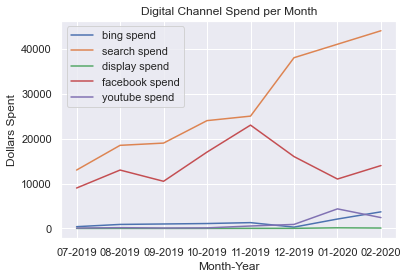

In [42]:
x=['07-2019','08-2019','09-2019','10-2019','11-2019','12-2019','01-2020','02-2020']
bingy=[bing072019,bing082019,bing092019,bing102019,bing112019,bing122019,bing012020,bing022020]
searchy=[search072019,search082019,search092019,search102019,search112019,search122019,search012020,search022020]
displayy=[display072019,display082019,display092019,display102019,display112019,display122019,display012020,display022020]
facebooky=[facebook072019,facebook082019,facebook092019,facebook102019,facebook112019,facebook122019,facebook012020,facebook022020]
youtubey=[youtube072019,youtube082019,youtube092019,youtube102019,youtube112019,youtube122019,youtube012020,youtube022020]

plt.plot(x, bingy, label = "bing spend")
plt.plot(x, searchy, label = "search spend")
plt.plot(x, displayy, label = "display spend")
plt.plot(x, facebooky, label = "facebook spend")
plt.plot(x, youtubey, label = "youtube spend")


plt.xlabel("Month-Year")
plt.ylabel("Dollars Spent")
plt.title("Digital Channel Spend per Month")
plt.legend()
plt.show()

In [12]:
#conversions total per channel - first interaction
df4conversions['attribution_survey'].value_counts()


facebook            45862
tv                  16127
referral            11028
public_radio         3425
search               3020
pinterest            2800
other                2375
social_organic       1501
podcast              1278
youtube               971
affiliate             732
sirius xm             553
ott                   455
facebook_organic      295
direct_mail           183
amfm_radio            155
Name: attribution_survey, dtype: int64

In [22]:
#conversions per month based on channel - attribution_survey
# conv per month - 072019
youtubeconvjuly=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201907')])
searchconvjuly=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201907')])
facebookconvjuly=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201907')])
facebookorgconvjuly=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201907')])
facebooktotaljuly=facebookconvjuly+facebookorgconvjuly

# conv per month - 082019
youtubeconvaug=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201908')])
searchconvaug=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201908')])
facebookconvaug=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201908')])
facebookorgconvaug=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201908')])
facebooktotalaug=facebookconvaug+facebookorgconvaug

# conv per month - 092019
youtubeconvsep=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201909')])
searchconvsep=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201909')])
facebookconvsep=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201909')])
facebookorgconvsep=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201909')])
facebooktotalsep=facebookconvsep+facebookorgconvsep

# conv per month - 102019
youtubeconvoct=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201910')])
searchconvoct=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201910')])
facebookconvoct=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201910')])
facebookorgconvoct=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201910')])
facebooktotaloct=facebookconvoct+facebookorgconvoct

# conv per month - 112019
youtubeconvnov=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201911')])
searchconvnov=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201911')])
facebookconvnov=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201911')])
facebookorgconvnov=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201911')])
facebooktotalnov=facebookconvnov+facebookorgconvnov

# conv per month - 122019
youtubeconvdec=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='201912')])
searchconvdec=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='201912')])
facebookconvdec=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='201912')])
facebookorgconvdec=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201912')])
facebooktotaldec=facebookconvdec+facebookorgconvdec

# conv per month - 012020
youtubeconvjan=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='202001')])
searchconvjan=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='202001')])
facebookconvjan=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='202001')])
facebookorgconvjan=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='202001')])
facebooktotaljan=facebookconvjan+facebookorgconvjan

# conv per month - 022020
youtubeconvfeb=len(df4conversions[(df4conversions["attribution_survey"]=="youtube") & (df4conversions["account_creation_date"]=='202002')])
searchconvfeb=len(df4conversions[(df4conversions["attribution_survey"]=="search") & (df4conversions["account_creation_date"]=='202002')])
facebookconvfeb=len(df4conversions[(df4conversions["attribution_survey"]=="facebook") & (df4conversions["account_creation_date"]=='202002')])
facebookorgconvfeb=len(df4conversions[(df4conversions["attribution_survey"]=="facebook_organic") & (df4conversions["account_creation_date"]=='202002')])
facebooktotalfeb=facebookconvfeb+facebookorgconvfeb









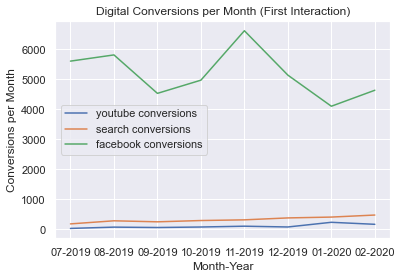

In [27]:
youtubec=[youtubeconvjuly,youtubeconvaug,youtubeconvsep,youtubeconvoct,youtubeconvnov,youtubeconvdec,youtubeconvjan,youtubeconvfeb]
searchc=[searchconvjuly,searchconvaug,searchconvsep,searchconvoct,searchconvnov,searchconvdec,searchconvjan,searchconvfeb]
facebookc=[facebooktotaljuly,facebooktotalaug,facebooktotalsep,facebooktotaloct,facebooktotalnov,facebooktotaldec,facebooktotaljan,facebooktotalfeb]

plt.plot(x, youtubec, label = "youtube conversions")
plt.plot(x, searchc, label = "search conversions")
plt.plot(x, facebookc, label = "facebook conversions")


plt.xlabel("Month-Year")
plt.ylabel("Conversions per Month")
plt.title("Digital Conversions per Month (First Interaction)")
plt.legend()
plt.show()

In [280]:
#conversions total per channel - last interaction
df4conversions['attribution_technical'].value_counts()


facebook                   30105
email                      10653
organic                     9792
search                      9396
brand sem intent google     8267
google_organic              4775
email_blast                 3724
affiliate                   3378
referral                    2953
pinterest                   2153
facebook_organic            1249
brand sem intent bing        988
discovery                    941
other                        864
display                      625
internal                     557
bing                         449
podcast                      375
youtube                      286
bing_organic                 181
vod                           92
direct_mail                   73
ott                           46
appstore                      30
samsung                       29
quora                         27
criteo                        17
pinterest_organic              9
playstore                      6
tv                             3
twitter   

In [75]:
#conversions per month based on channel - attribution_technical
# conv per month - 072019
bingconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201907')])
bingsemconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201907')])
bingorgconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201907')])
bingtotalconv1july=bingconv1july+bingsemconv1july+bingorgconv1july
searchconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201907')])
displayconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201907')])
facebookconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201907')])
facebookorgconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201907')])
facebooktotalconv1jul=facebookconv1july+facebookorgconv1july
youtubeconv1july=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201907')])

# conv per month - 082019
bingconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201908')])
bingsemconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201908')])
bingorgconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201908')])
bingtotalconv1aug=bingconv1aug+bingsemconv1aug+bingorgconv1aug
searchconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201908')])
displayconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201908')])
facebookconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201908')])
facebookorgconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201908')])
facebooktotalconv1aug=facebookconv1aug+facebookorgconv1aug
youtubeconv1aug=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201908')])

# conv per month - 092019
bingconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201909')])
bingsemconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201909')])
bingorgconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201909')])
bingtotalconv1sep=bingconv1sep+bingsemconv1sep+bingorgconv1sep
searchconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201909')])
displayconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201909')])
facebookconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201909')])
facebookorgconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201909')])
facebooktotalconv1sep=facebookconv1sep+facebookorgconv1sep
youtubeconv1sep=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201909')])

# conv per month - 102019
bingconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201910')])
bingsemconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201910')])
bingorgconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201910')])
bingtotalconv1oct=bingconv1oct+bingsemconv1oct+bingorgconv1oct
searchconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201910')])
displayconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201910')])
facebookconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201910')])
facebookorgconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201910')])
facebooktotalconv1oct=facebookconv1oct+facebookorgconv1oct
youtubeconv1oct=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201910')])

# conv per month - 112019
bingconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201911')])
bingsemconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201911')])
bingorgconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201911')])
bingtotalconv1nov=bingconv1nov+bingsemconv1nov+bingorgconv1nov
searchconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201911')])
displayconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201911')])
facebookconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201911')])
facebookorgconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201911')])
facebooktotalconv1nov=facebookconv1nov+facebookorgconv1nov
youtubeconv1nov=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201911')])

# conv per month - 122019
bingconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='201912')])
bingsemconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='201912')])
bingorgconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='201912')])
bingtotalconv1dec=bingconv1dec+bingsemconv1dec+bingorgconv1dec
searchconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='201912')])
displayconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='201912')])
facebookconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='201912')])
facebookorgconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='201912')])
facebooktotalconv1dec=facebookconv1dec+facebookorgconv1dec
youtubeconv1dec=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='201912')])

# conv per month - 012020
bingconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='202001')])
bingsemconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='202001')])
bingorgconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='202001')])
bingtotalconv1jan=bingconv1jan+bingsemconv1jan+bingorgconv1jan
searchconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='202001')])
displayconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='202001')])
facebookconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='202001')])
facebookorgconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='202001')])
facebooktotalconv1jan=facebookconv1jan+facebookorgconv1jan
youtubeconv1jan=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='202001')])

# conv per month - 022020
bingconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="bing") & (df4conversions["account_creation_date"]=='202002')])
bingsemconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="brand sem intent bing") & (df4conversions["account_creation_date"]=='202002')])
bingorgconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="bing_organic") & (df4conversions["account_creation_date"]=='202002')])
bingtotalconv1feb=bingconv1feb+bingsemconv1feb+bingorgconv1feb
searchconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="search") & (df4conversions["account_creation_date"]=='202002')])
displayconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="display") & (df4conversions["account_creation_date"]=='202002')])
facebookconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="facebook") & (df4conversions["account_creation_date"]=='202002')])
facebookorgconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="facebook_organic") & (df4conversions["account_creation_date"]=='202002')])
facebooktotalconv1feb=facebookconv1feb+facebookorgconv1feb
youtubeconv1feb=len(df4conversions[(df4conversions["attribution_technical"]=="youtube") & (df4conversions["account_creation_date"]=='202002')])



















3251

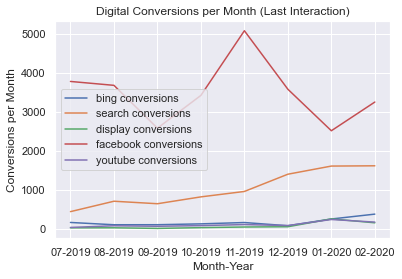

In [38]:
#graphing conversions per channel per month
bingd=[bingtotalconv1july,bingtotalconv1aug,bingtotalconv1sep,bingtotalconv1oct,bingtotalconv1nov,bingtotalconv1dec,bingtotalconv1jan,bingtotalconv1feb]
searchd=[searchconv1july,searchconv1aug,searchconv1sep,searchconv1oct,searchconv1nov,searchconv1dec,searchconv1jan,searchconv1feb]
displayd=[displayconv1july,displayconv1aug,displayconv1sep,displayconv1oct,displayconv1nov,displayconv1dec,displayconv1jan,displayconv1feb]
facebookd=[facebooktotalconv1jul,facebooktotalconv1aug,facebooktotalconv1sep,facebooktotalconv1oct,facebooktotalconv1nov,facebooktotalconv1dec,facebooktotalconv1jan,facebooktotalconv1feb]
youtubed=[youtubeconv1july,youtubeconv1aug,youtubeconv1sep,youtubeconv1oct,youtubeconv1nov,youtubeconv1dec,youtubeconv1jan,youtubeconv1feb]

plt.plot(x, bingd, label = "bing conversions")
plt.plot(x, searchd, label = "search conversions")
plt.plot(x, displayd, label = "display conversions")
plt.plot(x, facebookd, label = "facebook conversions")
plt.plot(x, youtubec, label = "youtube conversions")


plt.xlabel("Month-Year")
plt.ylabel("Conversions per Month")
plt.title("Digital Conversions per Month (Last Interaction)")
plt.legend()
plt.show()

In [79]:
#total cac per channel
b=bingcount/sum(bingd)
s=searchcount/sum(searchd)
d=displaycount/sum(displayd)
f=facebookcount/sum(facebookd)
y=youtubecount/sum(youtubed)

In [84]:
y

38.8

In [63]:
#calc cacs per channel per month
bingcostlist=[bing072019,bing082019,bing092019,bing102019,bing112019,bing122019,bing012020,bing022020]
searchcostlist=[search072019,search082019,search092019,search102019,search112019,search122019,search012020,search022020]
displaycostlist=[display072019,display082019,display092019,display102019,display112019,display122019,display012020,display022020]
facebookcostlist=[facebook072019,facebook082019,facebook092019,facebook102019,facebook112019,facebook122019,facebook012020,facebook022020]
youtubetlist=[youtube072019,youtube082019,youtube092019,youtube102019,youtube112019,youtube122019,youtube012020,youtube022020]


res = [i / j for i, j in zip(youtubetlist,youtubed )]

print(res)
        

[4    90.0
Name: spend_AED, dtype: float64, 9    36.0
Name: spend_AED, dtype: float64, 14    100.0
Name: spend_AED, dtype: float64, 19    32.5
Name: spend_AED, dtype: float64, 24    36.666667
Name: spend_AED, dtype: float64, 29    32.142857
Name: spend_AED, dtype: float64, 34    41.132075
Name: spend_AED, dtype: float64, 39    37.230769
Name: spend_AED, dtype: float64]


In [59]:
from operator import truediv
res = list(map(truediv, bingcostlist, bingd))
res

[0    2.515723
 Name: spend_AED, dtype: float64,
 5    9.0
 Name: spend_AED, dtype: float64,
 10    9.90099
 Name: spend_AED, dtype: float64,
 15    8.943089
 Name: spend_AED, dtype: float64,
 20    8.280255
 Name: spend_AED, dtype: float64,
 25    4.0
 Name: spend_AED, dtype: float64,
 30    8.467742
 Name: spend_AED, dtype: float64,
 35    9.919571
 Name: spend_AED, dtype: float64]

In [ ]:
res = list(map(truediv, searchcostlist, searchd))
res

In [ ]:
res = list(map(truediv, displaycostlist, displayd))
res

In [ ]:
res = list(map(truediv, facebookcostlist, facebookd))
res

In [ ]:
res = list(map(truediv, youtubetlist, youtubed))
res